# Генерація звуків

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import soundfile
from IPython.display import display, Audio
from scipy.io import wavfile

### Загальні налаштування і функції

In [3]:
SAMPLING_RATE = 48000  #частота дискретизації           #частота звуку
length = 4             #довжина генерованих файлів у секундах

clock_ticks = np.arange(0, length, 1/SAMPLING_RATE)       #розбиття проміжку на точки часу

def oscilator(frequency, amplitude, division=clock_ticks):
    '''
    Функція, що генерує звукову хвилю заданої в аргументі частоти
    та множника амплітуди (1 - максимальна, 0 - мінімальна)
    '''
    return (np.sin(np.pi*2*frequency*division)*32767*amplitude).astype(np.int16)


def plot_signal(signal, steps = SAMPLING_RATE/20):
    '''
    Функція, що виводить графік сигналу
    '''
    plt.plot(np.arange(0, len(signal), 1), signal)
    if steps:
        plt.xlim(0, steps)
    plt.hlines(0, 0, len(signal), color='red')


#### Генерація синусоїди

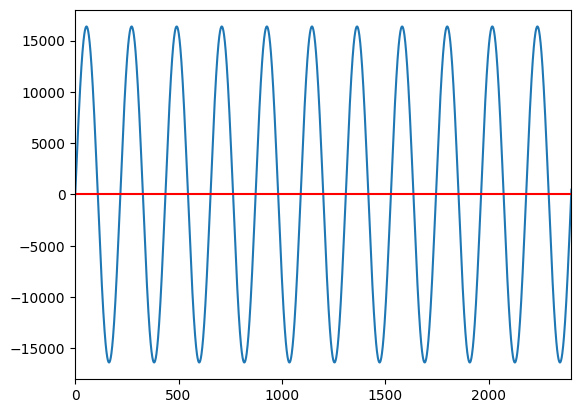

lenght of signal: 192000
lenght of rfft: 96001


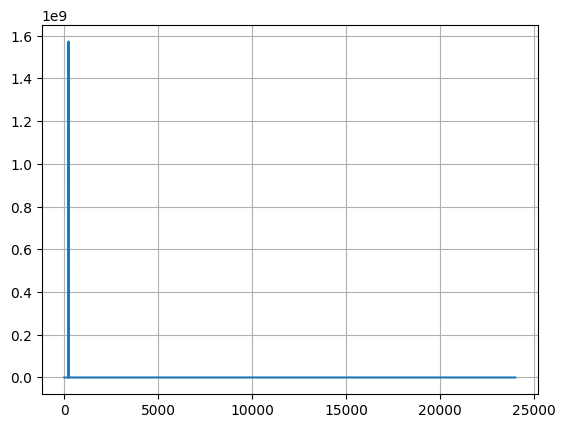

In [4]:
summa = oscilator(220, 0.5)

wavfile.write("sin_wave.wav", SAMPLING_RATE, summa)
display(Audio('sin_wave.wav'))
plot_signal(summa)
plt.show()


print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
# plt.xlim(0, 2000)
# print(abs(fft).max())
plt.grid()
plt.show()

#### Генерація суми 2 синусоїд частотами 110 та 330 Герц

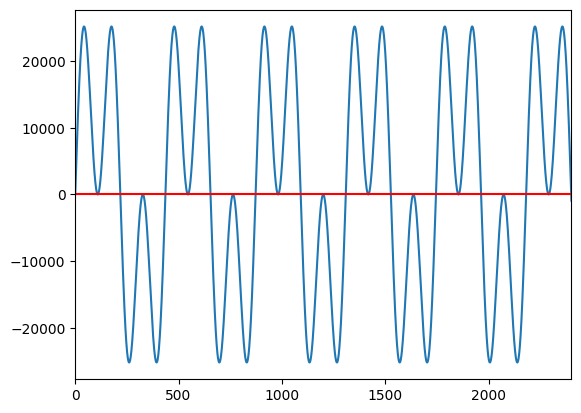

lenght of signal: 192000
lenght of rfft: 96001


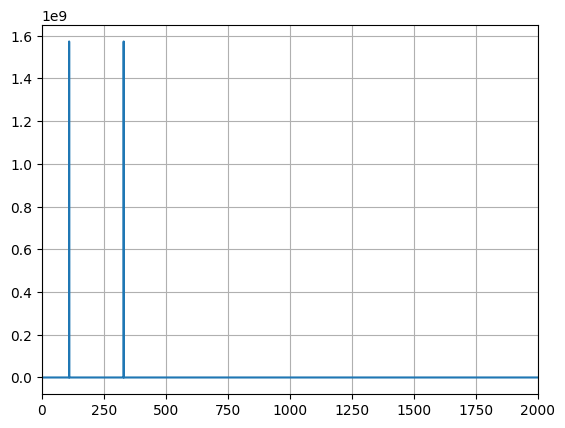

In [5]:
summa = oscilator(110, 0.5) + oscilator(330, 0.5) #+ oscilator(550, 0.3) + oscilator(770, 0.3)

wavfile.write("110_and_330.wav", SAMPLING_RATE, summa)
display(Audio('110_and_330.wav'))
plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 2000)
# print(abs(fft).max())
plt.grid()
plt.show()

#### Генерація квадратної хвилі

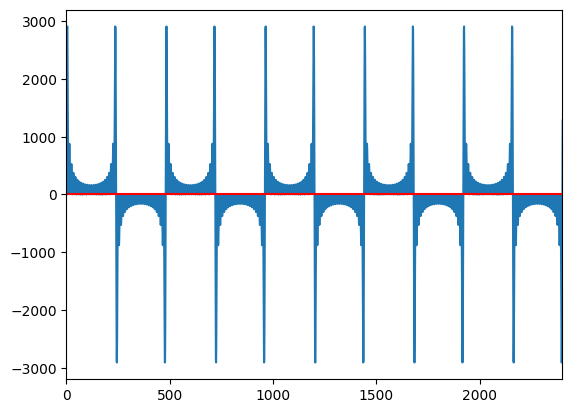

lenght of signal: 192000
lenght of rfft: 96001


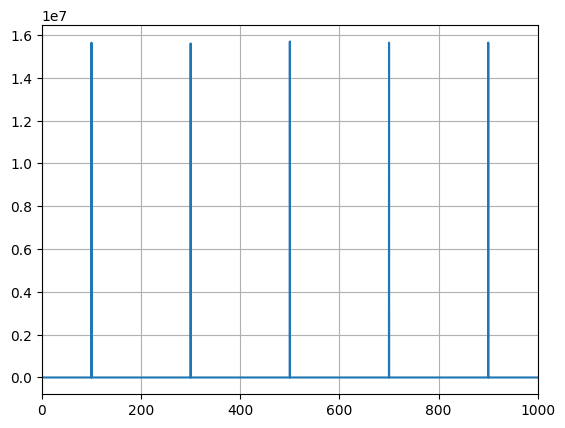

In [6]:
freq = 100
# summa = oscilator(220, 0.5) 
summa = np.sum(([oscilator(freq*i, 0.005) for i in range(1, 50, 2)]), axis=(0), dtype=np.int16)

wavfile.write("square_wave.wav", SAMPLING_RATE, summa)
display(Audio('square_wave.wav'))
plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 1000)
# print(abs(fft).max())
plt.grid()
plt.show()

#### Генерація пилоподібної хвилі

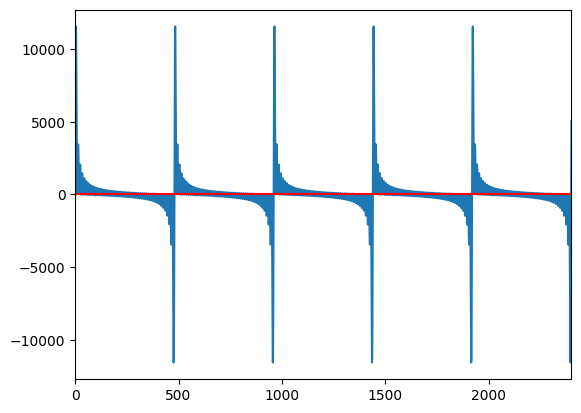

lenght of signal: 192000
lenght of rfft: 96001


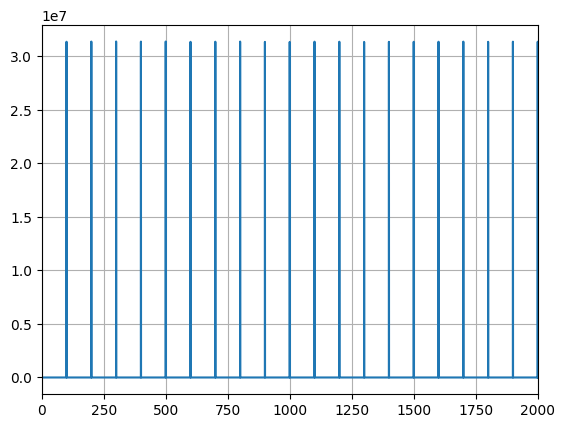

In [7]:
freq = 100
summa = np.sum(([oscilator(freq*i, 0.01) for i in range(1, 50)]), axis=(0), dtype=np.int16)

wavfile.write("sawtooth_wave.wav", SAMPLING_RATE, summa)
display(Audio('sawtooth_wave.wav'))
plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 2000)
# print(abs(fft).max())
plt.grid()
plt.show()

#### Генерація тризвуку як суми 3 синусоїд

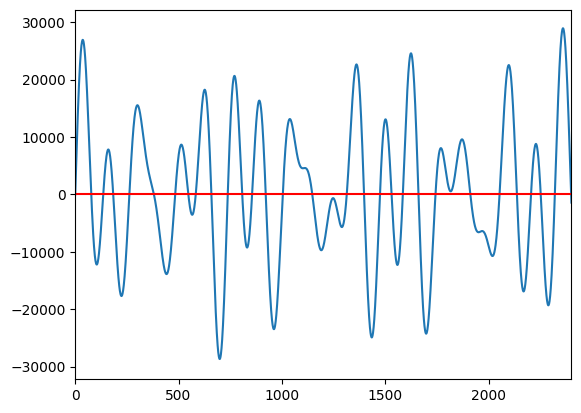

lenght of signal: 192000
lenght of rfft: 96001


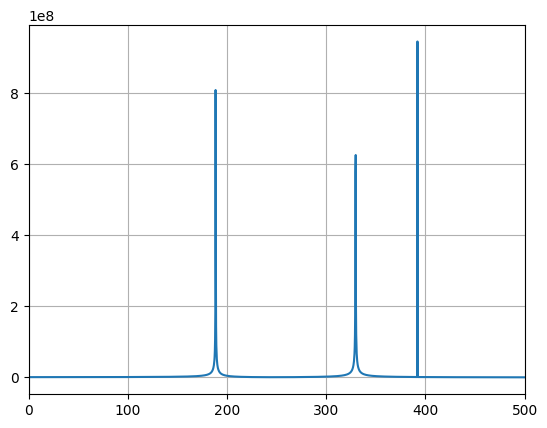

In [8]:
summa = oscilator(188.576, 0.3) + oscilator(329.63, 0.3) + oscilator(392.00, 0.3)

wavfile.write("triad.wav", SAMPLING_RATE, summa)
display(Audio('triad.wav'))
plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 500)
# print(abs(fft).max())
plt.grid()
plt.show()


Той самий акорд, відтворений справжньою гітарою, звучатиме так:

In [9]:
display(Audio('guitar-c-triad.wav'))

In [10]:
display(Audio('guitar_g_note.wav'))

48000 [-49 -10 -15 ... 106 132 136]


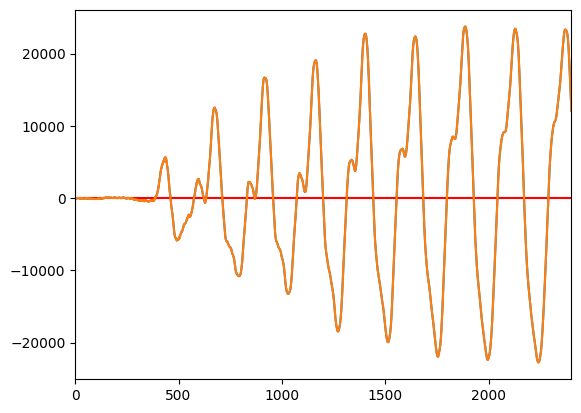

lenght of signal: 168960
lenght of rfft: 84481


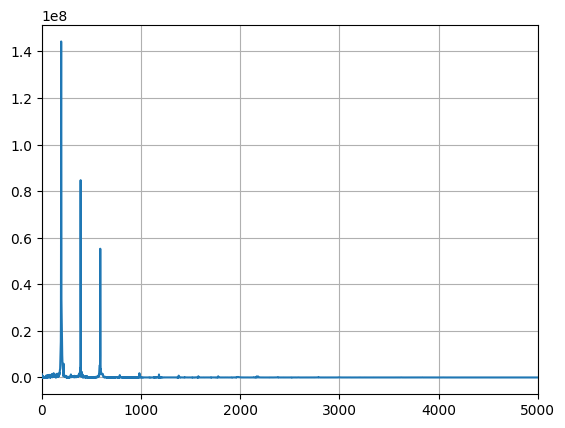

In [58]:
guitar_sr, guitar_data = wavfile.read('guitar_g_note.wav')
print(guitar_sr, guitar_data)

plot_signal(guitar_data)
plt.plot(guitar_data)
plt.vlines([0], ymin = -20000, ymax=20000, colors='red', zorder=1)
# plt.plt
# plt.xlim(0, 25000)
plt.show()


print(f'lenght of signal: {len(guitar_data)}')
fft = np.fft.rfft(guitar_data)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(guitar_data), 1/guitar_sr)
plt.plot(x_freq, abs(fft), zorder=4)
# plt.xticks(np.arange(0, 1000, 100))
plt.xlim(0, 5000)
# plt.vlines([197*i for i in range(1, 6)], ymin = 0, ymax=pow(10, 8), colors='red', zorder=1)
# plt.vlines([329.63*i for i in range(1, 5)], ymin = 0, ymax=pow(10, 8), colors='green', zorder=1)
# plt.vlines([392.00*i for i in range(1, 5)], ymin = 0, ymax=pow(10, 8), colors='violet', zorder=1)


plt.grid()
plt.show()

In [ ]:
summa = oscilator(197, 0.5) + oscilator(197*2, 0.3) + oscilator(197*3, 0.18)

wavfile.write("triad.wav", SAMPLING_RATE, summa)
display(Audio('triad.wav'))
plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(clock_ticks), 1/SAMPLING_RATE)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 1000)
# print(abs(fft).max())
plt.grid()
plt.show()

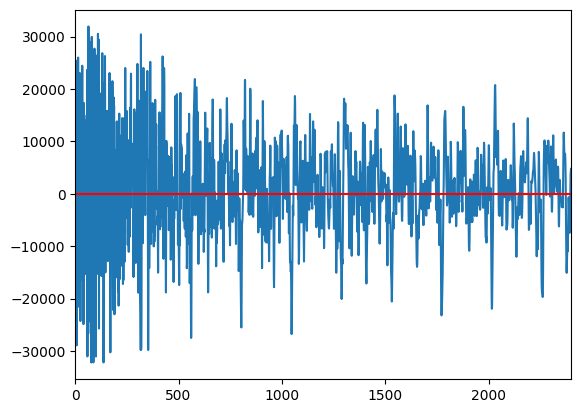

lenght of signal: 192000
lenght of rfft: 96001


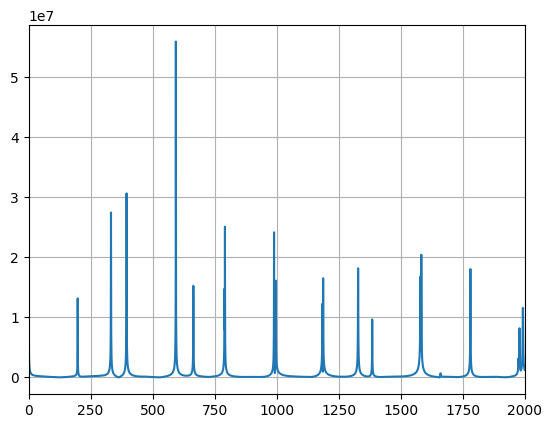

In [65]:
# Реалізація алгоритму Карплуса-Стронга

from collections import deque 

def generate_note(freq):
    nSamples = 48000*4
    sampleRate = 48000
    N = int(sampleRate/freq)
    # initialize ring buffer
    buf = deque([np.random.random() - 0.5 for i in range(N)])
    # init sample buffer
    samples = np.array([0]*nSamples, 'float32')
    for i in range(nSamples):
        samples[i] = buf[0]
        avg = 0.995*0.5*(buf[0] + buf[1])
        buf.append(avg)
        buf.popleft()  
        # plot of flag set 
      
    # samples to 16-bit to string
    # max value is 32767 for 16-bit
    samples = np.array(samples * 32767, 'int16')
    return samples


summa = generate_note(197) + generate_note(329.63) + generate_note(392)
# summa = guitar_generator(188.576) + guitar_generator(329.63) + guitar_generator(392)

# summa = butter_lowpass_filter(summa, 4000, 48000).astype('int16')

wavfile.write("experiment.wav", SAMPLING_RATE, summa)
display(Audio('experiment.wav'))
display(Audio('guitar_c_triad.wav'))

plot_signal(summa)
plt.show()

print(f'lenght of signal: {len(summa)}')
fft = np.fft.rfft(summa)
print(f'lenght of rfft: {len(fft)}')
x_freq = np.fft.rfftfreq(len(summa), 1/48000)
plt.plot(x_freq, abs(fft))
# plt.xticks(np.arange(0, 2000, 200))
plt.xlim(0, 2000)
# print(abs(fft).max())
plt.grid()
plt.show()
    